# Contents 

- Previous work
- Motivation 
- Related studies
- Proposed method
- Real data analysis


# Previous work

## GODE

- Graph fourier transform based Outlier Detection using Ebayesthresh (GODE) is a method for detecting outliers in non-Euclidean data.

## GODE


::: {.panel-tabset}

### Step1 

`1`. 

- From the graph signal $({\cal V}, {\cal E}, {\boldsymbol f})$ define the (normalized) Graph Laplacian 

$${\bf L}={\bf I}-{\bf D}^{-1/2}({\bf D}-{\bf W}){\bf D}^{-1/2}$$ 

where ${\bf D}$ is degree matrix.

- Check ${\bf L}$ satisfies the conditions for GSO

### Step2

`2`. 

- Decompose the Graph Laplacian ${\bf L}$ into

$${\bf L}={\bf V}{\boldsymbol \Lambda}{\bf V}^H$$ 

and get the GFT of ${\boldsymbol f}$, i.e., calculate ${\bf V}^H{\boldsymbol f}$. 

- Find periodogram of $({\cal V},{\cal E}, {\boldsymbol f})$, i.e., $\frac{1}{N}\sum_{i=1}^{N}\|{\bf V}^H{\boldsymbol f}\|^2.$

### Step2

`2`. Estimate the underlying function $\widehat{\boldsymbol f}$

- From $\hat{F}(\omega)$ estimate $\hat{F}_s(\omega)$ using ${\tt Ebayesthresh}$. 
- Apply inverse graph Fourier transform on $\hat{F}_s(\omega)$. 

### Step3

`3`. Get anomalousness score:

- Calculate ${\boldsymbol a} = \|{\boldsymbol f}-\widehat{\boldsymbol f}\|_2^2$. 

:::

## GODE

![Fig1: Embedding results with three different distances.](fig_previous_figure.png)

In [ ]:
## Slide Title {background-color="aquamarine"}

## GODE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.DataFrame(np.array([[0.988 , 0.988 , 1.000 , 0.994],
[0.871 , 0.962 , 0.900 , 0.930],
[0.950 , 1.000 , 0.947 , 0.973],
[0.972 , 0.985 , 0.985 , 0.985],
[0.940 , 0.994 , 0.942 , 0.968],
[0.950 , 1.000 , 0.947 , 0.973],
[0.950 , 1.000 , 0.947 , 0.973],
[0.988 , 0.994 , 0.994 , 0.994],
[0.889 , 1.000 , 0.883 , 0.938],
[0.960 , 0.978 , 0.980 , 0.979],
[0.960 , 0.978 , 0.980 , 0.979],
[0.895 , 0.969 , 0.919 , 0.943],
[0.896 , 0.970 , 0.919 , 0.944],
[0.950 , 1.000 , 0.947 , 0.973]]))

In [3]:
methods=["GODE","LOF","kNN","CBLOF","OCSVM","MCD","Feature Bagging","ABOD","Isolation Forest","HBOS","SOS","SO-GAAL","MO-GAAL","LSCP"]

In [4]:
df.columns = pd.Index(['ACC','PRE','REC','F1'])
df.index = pd.Index(methods)

In [7]:
df.plot.bar(backend='plotly',y=['ACC','REC','PRE','F1'])

## Previous work{.scrollable}

| Simple Linear/Orbit/Stanford Bunny         | ${\tt ACC}$ | ${\tt PRE}$ | ${\tt REC}$ | ${\tt F_1}$ || ${\tt ACC}$ | ${\tt PRE}$ | ${\tt REC}$ | ${\tt F_1}$ || ${\tt ACC}$ | ${\tt PRE}$ | ${\tt REC}$ | ${\tt F_1}$ |
|:-------------------------------------------|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| GODE                                       | 0.988 | 0.988 | 1.000 | 0.994 |       | 0.997 | 0.997 | 1.000 | 0.998 |       | 0.995 | 0.995 | 0.999 | 0.997 |
| LOF [@breunig2000lof]                      | 0.871 | 0.962 | 0.900 | 0.930 |       | 0.886 | 0.987 | 0.892 | 0.937 |       | 0.928 | 0.957 | 0.869 | 0.963 |
| kNN [@ramaswamy2000efficient]              | 0.950 | 1.000 | 0.947 | 0.973 |       | 0.948 | 0.999 | 0.946 | 0.972 |       | 0.940 | 0.996 | 0.941 | 0.968 |
| CBLOF [@he2003discovering]                 | 0.972 | 0.985 | 0.985 | 0.985 |       | 0.918 | 0.957 | 0.957 | 0.957 |       | 0.978 | 0.989 | 0.987 | 0.988 |
| OCSVM [@manevitz2001one]                   | 0.940 | 0.994 | 0.942 | 0.968 |       | 0.923 | 0.988 | 0.931 | 0.958 |       | 0.932 | 0.991 | 0.937 | 0.963 |
| MCD [@hardin2004outlier]                   | 0.950 | 1.000 | 0.947 | 0.973 |       | 0.866 | 0.953 | 0.903 | 0.928 |       | 0.935 | 0.993 | 0.938 | 0.965 |
| Feature Bagging [@lazarevic2005feature]    | 0.950 | 1.000 | 0.947 | 0.973 |       | 0.912 | 0.979 | 0.927 | 0.952 |       | 0.915 | 0.982 | 0.928 | 0.965 |
| ABOD [@kriegel2008angle]                   | 0.988 | 0.994 | 0.994 | 0.994 |       | 0.988 | 0.994 | 0.994 | 0.994 |       | 0.977 | 0.989 | 0.987 | 0.988 |
| Isolation Forest [@liu2008isolation]       | 0.889 | 1.000 | 0.883 | 0.938 |       | 0.378 | 0.997 | 0.346 | 0.514 |       | 0.794 | 0.995 | 0.788 | 0.879 |
| HBOS [@goldstein2012histogram]             | 0.960 | 0.978 | 0.980 | 0.979 |       | 0.881 | 0.961 | 0.912 | 0.936 |       | 0.895 | 0.969 | 0.919 | 0.944 |
| SOS [@janssens2012stochastic]              | 0.960 | 0.978 | 0.980 | 0.979 |       | 0.881 | 0.961 | 0.912 | 0.936 |       | 0.895 | 0.969 | 0.919 | 0.944 |
| SO-GAAL [@liu2019generative]               | 0.895 | 0.969 | 0.919 | 0.943 |       | 0.876 | 0.959 | 0.908 | 0.933 |       | 0.952 | 0.952 | 1.000 | 0.975 |
| MO-GAAL [@liu2019generative]               | 0.896 | 0.970 | 0.919 | 0.944 |       | 0.950 | 0.950 | 1.000 | 0.974 |       | 0.952 | 0.952 | 1.000 | 0.975 |
| LSCP [@zhao2019lscp]                       | 0.950 | 1.000 | 0.947 | 0.973 |       | 0.948 | 0.999 | 0.946 | 0.972 |       | 0.940 | 0.996 | 0.941 | 0.967 |

: Simulation Result {#tbl-previous_tb}
: {tbl-colwidths="[15,15,15,15,15,15,15,15,15,15,15,15,15,15,15]"}

## Previous work

### Real data Result

![Fig2: Embedding results with three different distances.](fig_previous_figure_map.png)

## Motivation

::: {.panel-tabset}

### Spatiotemporal data

- Spatiotemporal data is collected across space and time and describes a phenomenon in a specific location and time.

### Example

- The Sensors' of machines,  traffic data, and temporal data.
- Neuroimaging data include brain activity, spatial location, and time of measurement, and web-search requests have space and time data which include a geographic location and time from which they are made[@atluri2018spatio].
    
:::

## Motivation

::: {.panel-tabset}

### Missing Values

- Most spatiotemporal dataset based on observed values includes observations with missing values.


### Example

- Example(many natural and man-made factors)[@li2018missing]
    - Malfunctioning devices
    - data transfer problem
    - some sensor readings are lost at unexpected moments

:::

## Motivation

::: {.panel-tabset}

### The point

- The dataset should be complete on time domain.
- We will make the dataset to complete data like other articles.
- The simple way to make the dataset complete data is using the Interpolation method.

### The Interpolation methods

![Fig3: We use the interpolation method on the data which have 75% missing values](fig1.png){width=100%}

:::

## Motivation

### Simple Steps for our method

1. There is a dataset that has missing values(more than 50%)
2. Make the incomplete data as complete data using the interpolation method
3. Update missing data using $\tt{Ebayesthresh}$ and $\tt{Self Consistent Estimator}$
4. Compare other deep learning models with our method

## Motivation

![Fig3: We get $y = \alpha \sin \beta x$ and has 70% missing values. First(left-upper side) has the complete data, Second(right-upper side) has the observed data, third(left-down dise) has the values that has done with the linear interpolation method. Fourth(right-down side) has the result of STGCN(red line) and IT-STGCN(blue line).](try1_node1.png)

## Related studies

### Ebayesthresh

![Fig3: Simulated data $x$ (left) and estimate $\mu_i$ for sparse example (right).
Only 25 of the 1000 underlying parameters $\mu_i$ are nonzero. [@johnstone2005ebayesthresh]](Ebayesthresh.png){width=50%}

## Related studies{.smaller}

### Self-Consistent Estimator

[@lee2007self] assessed a self-consistent regression estimator in the context of incomplete data. They proposed an estimate $\hat{f}$ of the underlying obs function $f$ based on observed data $x_{obs}$ that is the solution of the following self-consistent equation
$$E(\hat{f}_{com} | x_{obs}, f = \hat{f}_{obs}) = \hat{f}_{obs}$$
where $\hat{f}$ indicates an estimate of $f$ derived from the hypothetical complete data $x_{com} = (x_{obs},x_{mis})$. $x_{mis}$ means missing data and $E(\cdot)$ denotes the expectation operator. We note that $x_{mis}$ still needs to be completed in practice. 

In practice, the missing values $\{ f(n) : n \in M \}$ are not acceptable, and thus, considering imputed values $\{ \tilde{f}(n) : n \in M \}$, we obtain an estimated complete dataset $\{ \hat{f}(n)\} = \{ f(n) : n \in O \} \cup \{ \tilde{f}(n) : n \in M \}$.

## Related studies

### Self-Consistent Estimator

![Fig3: The Figure 3 is a result of Self Consistent Estimator. When we get the incomplete data and if we update missing values, it would converge to the true function.](Self_consistency_Toy.png){width=100%}

## Related studies

### Riview of other deep learning models

- GConvGRU
- GConvLSTM
- GLSTM
- ..

## Proposed method

**Step 1**

For given graph signal $({\cal V},{\cal E}, {\bf f})$, calculate its Discrete Fourier Transform. 
$$d(f) = \frac{1}{\sqrt{n}} \sum^n_{t=1} f_t e^{-2\pi  i f_t}$$

## Proposed method

**Step 2. Estimate** $f$

1.Define the weight matrix ${\bf W}$ as considering the adjacency matrix.
- Proof some properties in heavysnow process.

2. Get graph Laplacian ${\bf L}={\bf D}-{\bf W}$ and normalized graph Laplacian ${\bf \tilde L}={\bf I}-({\bf D^+})^{1/2}{\bf L}({\bf D^+})^{1/2}$ where ${\bf D}$ is degree matrix and ${\bf D}^+$ is the Moore–Penrose inverse.

3. Decompose ${\bf \tilde L}$ into ${\bf \tilde L}={\bf V}{\bf \Lambda}{\bf V}^\top$ and get the DFT of ${\bf f}$, i.e., calculate ${\bf V}^\top{\bf f}$.

- Find periodogram of $({\cal V},{\cal E}, {\bf f}){}$, i.e., $\frac{1}{N}\sum_{i=1}^{N}|{\bf V}^\top{\bf f_{\tt threshed}}|^2.$

## Proposed method

**Step 3. Estimate the underlying function** $f$

- From $f$ estimate $f_{\tt trimed}$ on each ${\cal V}$ using Ebayesthresh.
- Apply inverse graph Fourier transform on $f_{\tt trimed}$. 

## Real data analysis

### WikiMaths

- Nodes are wikipedia pages, edges are links between nodes, targets($y$) are the daily user visits.

In [78]:
# | echo: true
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

_df = pd.read_csv('./presentation.csv')

In [109]:
print('GNAR MSE value: ',_df.query("dataset=='wikimath' and method=='GNAR'")['mse'].mean().round(3))

GNAR MSE value:  1.287


## Real data analysis

### WikiMaths

Text(0.5, 43.32800000000003, 'Missing Rate')

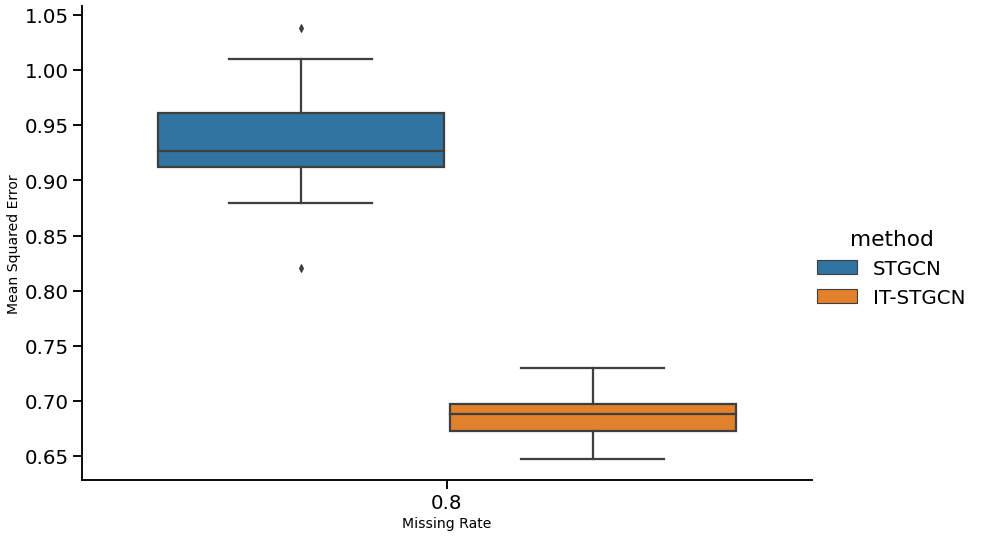

In [141]:
sns.set_context("talk", font_scale=1.2)
sns.catplot(x='mrate', 
            y='mse',
            hue="method",
            kind="box",
            data=_df.query("dataset=='wikimath' and method!='GNAR' and mtype=='rand' and mrate==0.8"), 
            height=8, 
            aspect=1.5);
# plt.title("The boxplot with STGCN, IT-STGCN on Wikimaths dataset", size=18)
plt.ylabel("Mean Squared Error", size=14)
plt.xlabel("Missing Rate",size=14)

## Real data analysis{.scrollable}

|Dataset|RecurrentGCN|Method|Missing Rate|Filters|Lags|Mean|SD|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|fivenodes|GConvGRU|IT-STGCN|0.7|12|2|1.167|0.059|
|fivenodes|GConvGRU|STGCN|0.7|12|2|2.077|0.252|
|chickenpox|GConvGRU|IT-STGCN|0.8|16|4|1.586|0.199|
|chickenpox|GConvGRU|STGCN|0.8|16|4|2.529|0.292|
|pedalme|GConvGRU|IT-STGCN|0.6|12|4|1.571|0.277|
|pedalme|GConvGRU|STGCN|0.6|12|4|1.753|0.239|
|wikimath|GConvGRU|IT-STGCN|0.8|12|8|0.687|0.021|
|wikimath|GConvGRU|STGCN|0.8|12|8|0.932|0.04|
|windmillsmall|GConvGRU|IT-STGCN|0.7|12|8|1.180|0.035|
|windmillsmall|GConvGRU|STGCN|0.7|12|8|1.636|0.088|
|monte|GConvGRU|IT-STGCN|0.8|12|4|1.096|0.019|
|monte|GConvGRU|STGCN|0.8|12|4|1.516|0.040|

## Conclusion

::: {.incremental}
- If we consider nodes information when we calculate the weight matrix, we will extend Graph Fourier Transform. It would give you more accurate results because it would view nodes and time information simultaneously. 
- In this article, we only use static spatiotemporal datasets. However, it will also operate on dynamic spatiotemporal datasets.
:::

## Thank you

In [155]:
# pd.merge(_df.query("mtype=='rand'").groupby(['dataset','method','mrate','nof_filters','lags'])['mse'].mean().reset_index(),
#          _df.query("mtype=='rand'").groupby(['dataset','method','mrate','nof_filters','lags'])['mse'].std().reset_index(),
#          on=['dataset','method','mrate','nof_filters','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)